In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Activate Google Drive Path if Use Colab
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Machine Learning/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#tabel = pd.read_csv('Data/risk_prediction/prudential_train.csv')
tabel = pd.read_csv(path + 'prudential_train.csv')

In [52]:
tabel

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474550,0.598039,0.444890,0.526786,4.000000,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497737,0.084507,0.484635,5.000000,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.304348,0.497737,0.225352,0.484635,10.000000,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.420290,0.497737,0.352113,0.484635,0.000000,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.463768,0.497737,0.408451,0.484635,7.962172,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.000000,3,0.025000,1,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.217391,0.497737,0.197183,0.484635,0.000000,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.100,9,1,0.000010,2,0.350000,1,2,3,3,1,1,1,2,1,3,2,0.000267,1,3,2,3,0.565217,0.497737,0.478873,0.484635,24.000000,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,0.035,9,1,0.000000,2,0.361469,1,2,6,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.173913,0.497737,0.126761,0.484635,7.962172,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,0.038,9,1,0.006283,3,0.361469,1,2,3,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.474550,0.372549,0.704225,0.48463

In [3]:
cont_var = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
            'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
disc_var = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
dtype: float64


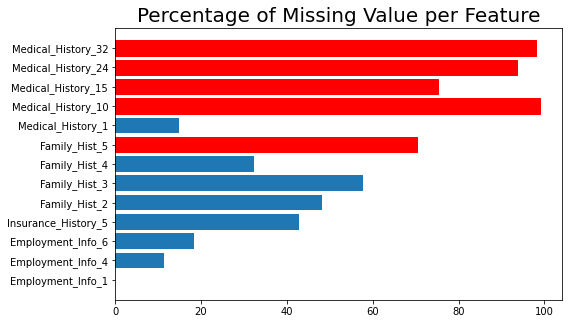

In [5]:
coba = tabel[tabel.columns[tabel.isnull().any()]].isnull().sum()/len(tabel) * 100
coba = pd.DataFrame(coba).reset_index().rename(columns={'index':'nama', 0:'persen'})

plt.figure(figsize=(8,5))
barlist = plt.barh('nama', 'persen', data=coba)
barlist[9].set_color('r')
barlist[7].set_color('r')
barlist[10].set_color('r')
barlist[11].set_color('r')
barlist[12].set_color('r')

plt.title('Percentage of Missing Value per Feature', fontdict={'fontsize':20})
print(tabel[tabel.columns[tabel.isnull().any()]].isnull().sum()/len(tabel) * 100)

In [4]:
miss_val = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 
            'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_10', 
            'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

In [5]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

for name in miss_val:
    tabel[name] = imp.fit_transform(tabel[name].values.reshape(-1, 1))

In [6]:
print('jumlah null:', tabel.isnull().sum().sum())

jumlah null: 0


Class=8, n=19489 (32.820%)
Class=4, n=1428 (2.405%)
Class=1, n=6207 (10.453%)
Class=6, n=11233 (18.917%)
Class=2, n=6552 (11.034%)
Class=7, n=8027 (13.518%)
Class=3, n=1013 (1.706%)
Class=5, n=5432 (9.148%)


Text(0.5, 1.0, 'The Number of Each Response')

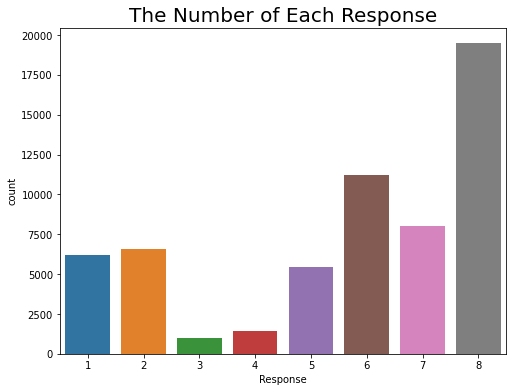

In [9]:
from collections import Counter

counter = Counter(tabel['Response'])
counter.items()

for k,v in counter.items():
    per = v / len(tabel['Response']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

#plotting
plt.figure(figsize=(8,6))
p = sns.countplot(x='Response', data=tabel)
plt.title('The Number of Each Response', fontdict={'fontsize':20})

In [7]:
dummy_var = [name for name in tabel.columns if '_Keyword_' in name]
num_var = cont_var + disc_var + dummy_var
cat_var = [name for name in tabel.columns 
           if name not in num_var]
cat_var.remove('Id')
cat_var.remove('Response')

In [8]:
y = tabel['Response']
X = tabel.drop(['Response', 'Id'], axis=1)

In [9]:
for col in X.columns:
    if col in cat_var:
        #print(col)
        col_dum = pd.get_dummies(X[col], prefix=col)
        X = X.drop(col,axis = 1)
        X = X.join(col_dum)

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X[num_var] = std.fit_transform(X[num_var])

In [14]:
real_feature = [name for name in X.columns]
fitur = X.copy()

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
#print(sorted(Counter(y).items()))

### GSO

In [24]:
#X = X.to_numpy()
#df_matrix = X
r = 895
candidates = real_feature.copy()

In [25]:
X = X.T #T untuk transpose
n = X[:, 0].size 
dim = X[0, :].size 

In [26]:
M = X.copy()
M_orig = X.copy()

In [27]:
# stored recovered anchor words
features = np.zeros((r, dim))
feature_indices = np.zeros(r, dtype=np.int)

In [28]:
# store the basis vectors of the subspace spanned by the anchor word vectors
basis = np.zeros((r-1, dim))

In [29]:
# find the farthest point p1 from the origin
max_dist = 0
#for i in range(0, n):
for i in range(len(candidates)):
    dist = np.dot(M[i],M[i]) #inner product
    if dist > max_dist:
        max_dist = dist
        features[0] = M_orig[i]
        feature_indices[0] = i

In [30]:
# let p1 be the origin of our coordinate system
#for i in range(0, n):
for i in range(len(candidates)):
    M[i] = M[i] - features[0]

In [31]:
# find the farthest point from p1
max_dist = 0
#for i in range(0, n):
for i in range(len(candidates)):
    dist = np.dot(M[i], M[i])
    if dist > max_dist:
        max_dist = dist
        features[1] = M_orig[i]
        feature_indices[1] = i
        basis[0] = M[i]/np.sqrt(np.dot(M[i], M[i]))

In [32]:
# stabilized gram-schmidt which finds new anchor words to expand our subspace
for j in range(1, r - 1):

    # project all the points onto our basis and find the farthest point
    max_dist = 0
    #for i in range(0, n):
    for i in range(len(candidates)):
        M[i] = M[i] - np.dot(M[i], basis[j-1])*basis[j-1]
        dist = np.dot(M[i], M[i])
        if dist > max_dist:
            max_dist = dist
            features[j + 1] = M_orig[i]
            feature_indices[j + 1] = i
            basis[j] = M[i]/np.sqrt(np.dot(M[i], M[i]))
#total 13m 5s

In [36]:
# convert numpy array to python list
feature_indices_list = []
for i in range(r):
    feature_indices_list.append(feature_indices[i])
print ("feature_indices_list :\n") 
print (feature_indices_list)

feature_indices_list :

[8, 15, 40, 871, 22, 52, 30, 14, 57, 59, 61, 48, 20, 36, 55, 35, 49, 29, 63, 25, 38, 26, 21, 65, 19, 53, 12, 64, 13, 50, 41, 43, 10, 17, 18, 60, 51, 24, 46, 44, 42, 28, 54, 27, 34, 33, 4, 31, 39, 45, 62, 56, 2, 47, 9, 16, 32, 6, 37, 23, 0, 58, 7, 5, 11, 1, 211, 135, 180, 798, 892, 213, 84, 175, 812, 880, 317, 206, 169, 863, 123, 363, 872, 178, 167, 82, 184, 189, 85, 75, 138, 83, 651, 201, 826, 796, 859, 128, 809, 516, 183, 140, 228, 362, 452, 174, 639, 848, 68, 86, 203, 74, 841, 194, 888, 818, 865, 190, 95, 66, 73, 806, 217, 69, 822, 832, 125, 773, 891, 186, 839, 130, 717, 356, 346, 845, 70, 831, 77, 759, 3, 540, 176, 825, 879, 72, 857, 112, 560, 214, 835, 193, 182, 210, 799, 869, 617, 171, 173, 333, 121, 357, 601, 884, 141, 882, 80, 685, 78, 816, 137, 412, 379, 399, 114, 168, 465, 267, 259, 262, 244, 850, 179, 226, 328, 71, 748, 99, 807, 757, 716, 157, 451, 79, 341, 578, 467, 423, 81, 546, 361, 589, 390, 454, 726, 531, 136, 574, 673, 290, 76, 583, 253, 119, 875

In [41]:
print(len(feature_indices_list))
print(len(set(feature_indices_list)))
print(set(feature_indices_list))
#masalah nih

895
846
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 167, 168, 169, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 189, 190, 192, 193, 194, 196, 197, 199, 200, 201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 

In [50]:
unique = []
for x in feature_indices_list:
  if x not in unique:
    unique.append(x)

In [54]:
sorted_feature = []
for i in unique:
    sorted_feature.append(real_feature[i])

## masuk model

In [58]:
fitur[sorted_feature]

,Insurance_History_5,Medical_History_15,Medical_Keyword_23,Medical_History_33_3,Medical_Keyword_5,Medical_Keyword_35,Medical_Keyword_13,Medical_History_10,Medical_Keyword_40,Medical_Keyword_42,Medical_Keyword_44,Medical_Keyword_31,Medical_Keyword_3,Medical_Keyword_19,Medical_Keyword_38,Medical_Keyword_18,Medical_Keyword_32,Medical_Keyword_12,Medical_Keyword_46,Medical_Keyword_8,Medical_Keyword_21,Medical_Keyword_9,Medical_Keyword_4,Medical_Keyword_48,Medical_Keyword_2,Medical_Keyword_36,Family_Hist_5,Medical_Keyword_47,Medical_History_1,Medical_Keyword_33,Medical_Keyword_24,Medical_Keyword_26,Family_Hist_3,Medical_History_32,Medical_Keyword_1,Medical_Keyword_43,Medical_Keyword_34,Medical_Keyword_7,Medical_Keyword_29,Medical_Keyword_27,...,Medical_History_2_648,Medical_History_2_580,Medical_History_2_6,Medical_History_2_149,Medical_History_2_558,Medical_History_2_50,Medical_History_2_426,Medical_History_2_291,Medical_History_2_419,Medical_History_2_513,Medical_History_2_427,Medical_History_2_492,Medical_History_2_215,Medical_History_2_93,Medical_History_2_422,Medical_History_26_1,Product_Info_3_13,Product_Info_3_22,Product_Info_3_1,Product_Info_3_38,Medical_History_41_3,Employment_Info_2_28,Insurance_History_2_3,Product_Info_3_27,Medical_History_23_2,Medical_History_40_2,Product_Info_3_5,Employment_Info_2_31,Medical_History_12_1,Medical_History_7_1,Medical_History_6_2,Medical_History_13_1,Medical_History_17_1,Medical_History_37_3,Insurance_History_1_1,InsuredInfo_3_9,Family_Hist_1_1,Insurance_History_9_1,Insurance_History_8_3,Employment_Info_3_1
0,-1.921111e-01,2.364678e+00,-0.329198,0,-0.093259,-0.083587,-0.077442,-5.451434e-15,-0.245752,-0.218424,-0.087091,-0.104956,-0.22766,-0.096867,-0.082972,-0.086894,-0.147058,-0.10052,-0.092521,-0.102552,-0.121725,-0.081832,-0.121511,-0.240076,-0.094989,-0.102552,5.997827e-01,-0.142512,-0.329824,-0.15287,-0.138776,-0.116712,1.099638,-1.008500e-15,-0.209383,-0.10405,-0.145195,-0.11877,-0.109062,-0.109535,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,-2.881911e-01,-2.517699e+00,-0.329198,1,-0.093259,-0.083587,-0.077442,-5.451434e-15,-0.245752,-0.218424,-0.087091,-0.104956,-0.22766,-0.096867,-0.082972,-0.086894,-0.147058,-0.10052,-0.092521,-0.102552,-0.121725,-0.081832,-0.121511,-0.240076,-0.094989,-0.102552,-1.579787e-15,-0.142512,-0.246581,-0.15287,-0.138776,-0.116712,0.000000,-1.008500e-15,-0.209383,-0.10405,-0.145195,-0.11877,-0.109062,-0.109535,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-7.812751e-17,2.890948e-16,-0.329198,1,-0.093259,-0.083587,-0.077442,-5.451434e-15,-0.245752,-0.218424,-0.087091,-0.104956,-0.22766,-0.096867,-0.082972,-0.086894,-0.147058,-0.10052,-0.092521,-0.102552,-0.121725,-0.081832,-0.121511,-0.240076,-0.094989,-0.102552,-1.579787e-15,-0.142512,0.169635,-0.15287,-0.138776,-0.116712,0.000000,-1.008500e-15,-0.209383,-0.10405,-0.145195,-0.11877,-0.109062,-0.109535,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-7.812751e-17,2.890948e-16,-0.329198,1,-0.093259,-0.083587,-0.077442,-5.451434e-15,-0.245752,-0.218424,-0.087091,-0.104956,-0.22766,-0.096867,-0.082972,-0.086894,6.800019,-0.10052,-0.092521,-0.102552,-0.121725,-0.081832,-0.121511,-0.240076,-0.094989,-0.102552,-1.579787e-15,-0.142512,-0.662797,-0.15287,-0.138776,-0.116712,0.000000,-1.008500e-15,-0.209383,-0.10405,-0.145195,-0.11877,-0.109062,-0.109535,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-7.812751e-17,2.890948e-16,-0.329198,1,-0.093259,-0.083587,-0.077442,-5.451434e-15,-0.245752,-0.218424,-0.087091,-0.104956,-0.22766,-0.096867,-0.082972,-0.086894,-0.147058,-0.10052,-0.092521,-0.102552,-0.121725,-0.081832,-0.121511,-0.240076,-0.094989,-0.102552,-1.579787e-15,-0.142512,0.000000,-0.15287,-0.138776,-0.116712,0.000000,-1.008500e-15,-0.209383,-0.10405,-0.145195,-0.11877,-0.109062,-0.109535,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
from imblearn.over_sampling import RandomOverSampler

target = tabel['Response']

ros = RandomOverSampler(random_state=0)
X1, y1 = ros.fit_resample(fitur[sorted_feature], target)
#print(sorted(Counter(y1).items()))

In [72]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X1, y1, test_size=0.2, random_state=42)

In [79]:
tokio_kang_tidur = [a for a in range(10,101,10)]
zein_keren = [a for a in range(5,100,10)]

In [102]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

def ayeaye(n_fitur):
  xgb = XGBClassifier(n_estimator=48, max_depth = 24, min_child_weight = 0.6457, subsample = 0.7612,
                      colsample_bytree = 0.7513, learning_rate = 0.5487,
                      reg_alpha = 3.155, reg_lambda = 3.559, verbose=True)
  xgb.fit(train_X[:,:n_fitur], train_y)
  #print(xgb.score(test_X, test_y))
  return accuracy_score(test_y, xgb.predict(test_X[:,:n_fitur]))

In [100]:
hasil = map(ayeaye, zein_keren)
hasil = list(hasil)
hasil = pd.DataFrame(hasil)

In [103]:
hasil['jumlah_fitur'] = zein_keren
hasil.rename(columns={0:'accuracy'}, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hasil['jumlah_fitur'], hasil['accuracy'], 'o')
plt.plot(hasil['jumlah_fitur'], hasil['accuracy'], '-')
#plt.figure(figsize=[180,18])
plt.title('Accuracy of Risk Level Insurance using XGBoost', fontdict={'fontsize':12}, color='blue')
plt.ylabel('Accuracy')
plt.xlabel('The Number of Features')